In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

TRAINING_DIR = "Training"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2)

VALIDATION_DIR = "Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size= 4
)

Found 766 images belonging to 3 classes.
Found 95 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adadelta
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 43264)           

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.08 and logs.get('loss')<=0.08):
      print('\nReached ^98%')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 24,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 24,
    callbacks=[callbacks]
)

model.save('COVIDcnn.h5')

Epoch 1/100
24/24 [==============================] - 10s 402ms/step - loss: 2.0889 - acc: 0.3995 - val_loss: 0.9198 - val_acc: 0.4947
Epoch 2/100
24/24 [==============================] - 9s 390ms/step - loss: 1.0019 - acc: 0.5940 - val_loss: 0.9068 - val_acc: 0.5053
Epoch 3/100
24/24 [==============================] - 9s 391ms/step - loss: 0.7462 - acc: 0.6789 - val_loss: 0.8181 - val_acc: 0.6316
Epoch 4/100
24/24 [==============================] - 9s 392ms/step - loss: 0.7068 - acc: 0.6997 - val_loss: 0.9743 - val_acc: 0.5684
Epoch 5/100
24/24 [==============================] - 9s 393ms/step - loss: 0.6226 - acc: 0.7507 - val_loss: 1.0536 - val_acc: 0.5789
Epoch 6/100
24/24 [==============================] - 9s 394ms/step - loss: 0.6265 - acc: 0.7467 - val_loss: 0.7741 - val_acc: 0.6316
Epoch 7/100
24/24 [==============================] - 10s 398ms/step - loss: 0.5693 - acc: 0.7872 - val_loss: 0.7323 - val_acc: 0.6737
Epoch 8/100
24/24 [==============================] - 9s 394ms/step 

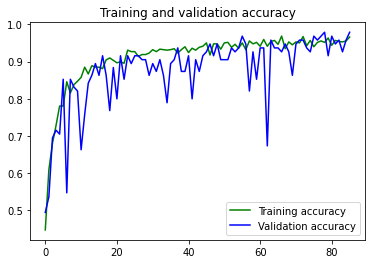

<Figure size 432x288 with 0 Axes>

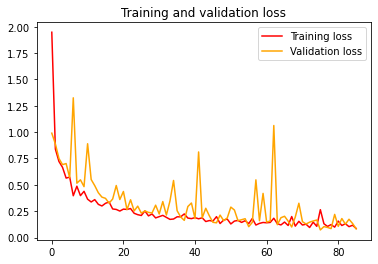

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig('/content/drive/My Drive/covidieeedataset/accCNN2.png')
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig('/content/drive/My Drive/covidieeedataset/lossCNN2.png')
plt.figure()
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/My Drive/covidieeedataset/CNN32.h5')

In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
import os
prediction = []
x = []
paths = os.listdir('/content/drive/My Drive/covidieeedataset/Testing/COVID')
for i in range(len(paths)):
  img = image.load_img('/content/drive/My Drive/covidieeedataset/Testing/COVID/'+paths[i], target_size=(224, 224))
  #print(type(img))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) / 255
  #print(type(images))
  classes = model.predict(images, batch_size=256)
  prediction.append(list(classes[0]).index(max(classes[0])))
paths = os.listdir('/content/drive/My Drive/covidieeedataset/Testing/NORMAL')
for i in range(len(paths)):
  img = image.load_img('/content/drive/My Drive/covidieeedataset/Testing/NORMAL/'+paths[i], target_size=(224, 224))
  #print(type(img))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) / 255
  #print(type(images))
  classes = model.predict(images, batch_size=256)
  prediction.append(list(classes[0]).index(max(classes[0])))
paths = os.listdir('/content/drive/My Drive/covidieeedataset/Testing/VIRAL')
for i in range(len(paths)):
  img = image.load_img('/content/drive/My Drive/covidieeedataset/Testing/VIRAL/'+paths[i], target_size=(224, 224))
  #print(type(img))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) / 255
  #print(type(images))
  classes = model.predict(images, batch_size=256)
  prediction.append(list(classes[0]).index(max(classes[0])))

In [ ]:
import numpy
from sklearn import metrics

y_act = validation_generator.classes

labels = [0, 1, 2]

print(metrics.confusion_matrix(y_act, np.array(prediction), labels=labels))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, np.array(prediction), labels=labels))

[[25  0  0]
 [ 0 35  0]
 [ 0  2 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.95      1.00      0.97        35
           2       1.00      0.94      0.97        35

    accuracy                           0.98        95
   macro avg       0.98      0.98      0.98        95
weighted avg       0.98      0.98      0.98        95



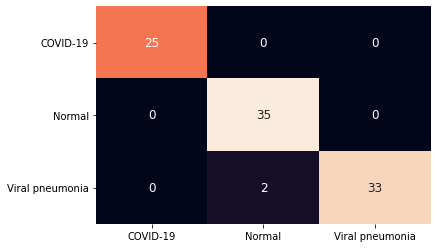

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
lbl = [0, 1, 2]
df_cm = pd.DataFrame(metrics.confusion_matrix(y_act, np.array(prediction), labels=lbl), 
                     ['COVID-19', 'Normal', 'Viral pneumonia'], 
                     ['COVID-19', 'Normal', 'Viral pneumonia'])

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False,  cbar_kws={"orientation": "horizontal"})
plt.yticks(rotation=0) 
plt.savefig('/content/drive/My Drive/covidieeedataset/confusionmatrixCNN.png', bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
paths = os.listdir('/content/drive/My Drive/covidieeedataset/Testing/COVID')
img = image.load_img('/content/drive/My Drive/covidieeedataset/Testing/COVID/'+paths[20], target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x_train = np.vstack([x]) / 255

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/covidieeedataset/covidCNNmodel.h5')

In [ ]:
import matplotlib.pyplot as plt
def visualize_conv_layer(layer_name):
  
  layer_output=model.get_layer(layer_name).output
 
  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
 
  intermediate_prediction=intermediate_model.predict(x_train)
  
  row_size=4
  col_size=8
  
  img_index=0
 
  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))
 
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gist_heat')
 
      img_index=img_index+1
  plt.savefig('/content/drive/My Drive/covidieeedataset/infernoMapCNN.png')

(1, 52, 52, 64)


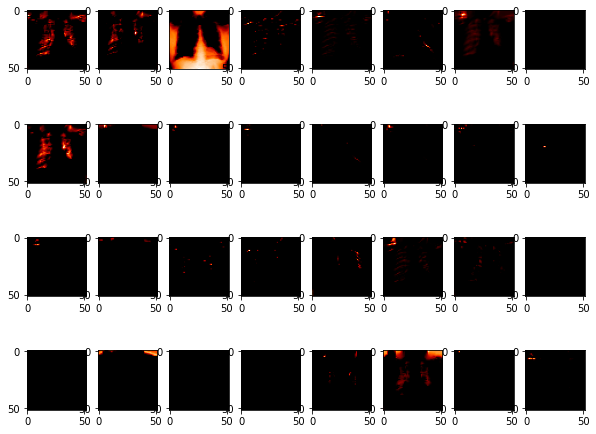

In [ ]:
visualize_conv_layer('conv2d_17')

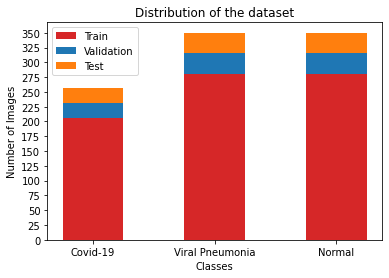

In [ ]:
import numpy as np
train_images = [206, 280, 280]
validation_images = [25, 35, 35]
test_images= [25, 35, 35]
plt.bar(range(len(train_images)),train_images, 0.5, color='#d62728')
plt.bar(range(len(validation_images)),validation_images, 0.5, bottom=train_images)
plt.bar(range(len(test_images)),test_images, 0.5, bottom=np.array(train_images)+np.array(validation_images))
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of the dataset')
plt.xticks(np.arange(3), ('Covid-19', 'Viral Pneumonia', 'Normal'))
plt.yticks(np.arange(0, 360, 25))
plt.legend(('Train', 'Validation', 'Test'))
plt.savefig('/content/drive/My Drive/covidieeedataset/dataset.png')
plt.show()

In [ ]:
import tensorflow as tf 
model = tf.keras.models.load_model('/content/drive/My Drive/covidieeedataset/covidCNNmodel.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image
import os
prediction = []
x = []
#paths = ['/content/drive/My Drive/COVID/VIRAL/Viral Pneumonia (102).jpg', '/content/drive/My Drive/COVID/NORMAL/NORMAL (102).jpg', '/content/drive/My Drive/COVID/images/Validation/covid/extubation-13.jpg']
paths = os.listdir('/content/drive/My Drive/covidieeedataset/Testing/COVID')
for i in range(len(paths)):
  img = image.load_img('/content/drive/My Drive/covidieeedataset/Testing/COVID/'+paths[i], target_size=(224, 224))
  #print(type(img))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) / 255
  #print(type(images))
  classes = model.predict(images, batch_size=256)
  prediction.append(list(classes[0]).index(max(classes[0])))
paths = os.listdir('/content/drive/My Drive/covidieeedataset/Testing/NORMAL')
for i in range(len(paths)):
  img = image.load_img('/content/drive/My Drive/covidieeedataset/Testing/NORMAL/'+paths[i], target_size=(224, 224))
  #print(type(img))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) / 255
  #print(type(images))
  classes = model.predict(images, batch_size=256)
  prediction.append(list(classes[0]).index(max(classes[0])))
paths = os.listdir('/content/drive/My Drive/covidieeedataset/Testing/VIRAL')
for i in range(len(paths)):
  img = image.load_img('/content/drive/My Drive/covidieeedataset/Testing/VIRAL/'+paths[i], target_size=(224, 224))
  #print(type(img))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) / 255
  #print(type(images))
  classes = model.predict(images, batch_size=256)
  prediction.append(list(classes[0]).index(max(classes[0])))

Using TensorFlow backend.


In [ ]:
import numpy
from sklearn import metrics

y_act = validation_generator.classes

labels = [0, 1, 2]

print(metrics.confusion_matrix(y_act, np.array(prediction), labels=labels))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, np.array(prediction), labels=labels))

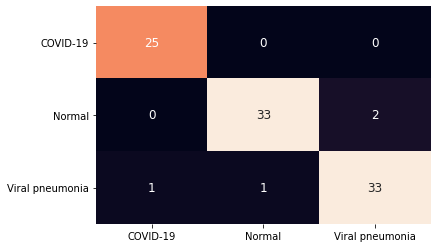

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
lbl = [0, 1, 2]
#plt.figure(figsize=[8, 5])
df_cm = pd.DataFrame(metrics.confusion_matrix(y_act, np.array(prediction), labels=lbl), 
                     ['COVID-19', 'Normal', 'Viral pneumonia'], 
                     ['COVID-19', 'Normal', 'Viral pneumonia'])

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False,  cbar_kws={"orientation": "horizontal"})
plt.yticks(rotation=0) 
plt.savefig('/content/drive/My Drive/covidieeedataset/confusionmatrixCNN.png', bbox_inches='tight',dpi=100)
plt.show()